<a href="https://colab.research.google.com/github/aditya140/PtrNet_TSP_Solver/blob/master/TSP_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/aditya140/PtrNet_TSP_Solver.git
!pip install -r /content/PtrNet_TSP_Solver/requirements.txt

Cloning into 'PtrNet_TSP_Solver'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 269 (delta 146), reused 185 (delta 75), pack-reused 0
Receiving objects: 100% (269/269), 24.75 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (146/146), done.
     |████████████████████████████████| 28.9MB 116kB/s 
     |████████████████████████████████| 1.3MB 39.9MB/s 
  Created wheel for hyperdash: filename=hyperdash-0.15.3-cp36-none-any.whl size=28553 sha256=d3ff0c473397cdc4c71e75d9876ed88cb409101626e95e4fdbb18658d88a18ee
  Stored in directory: /root/.cache/pip/wheels/62/5f/af/bbcaeb6570e4904c14fb4c1b70fee559a3788182ce4d104ce7
Successfully built hyperdash
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [3]:
cd PtrNet_TSP_Solver/

/content/PtrNet_TSP_Solver


#Downoad Dataset

In [0]:
!python download_dataset.py

#Train Model
5 pt model (default)
change hparams file to train for 10 pt model

In [5]:
%timeit
!python train.py

100% 1000/1000 [00:00<00:00, 656693.91data/s]
100% 1000/1000 [00:00<00:00, 3448.61solve/s]
Epoch: 01 | Time: 1m 31s
	Train Loss: 1.430 | Train PPL:   4.178
	 Val. Loss: 1.387 |  Val. PPL:   4.004
Epoch: 02 | Time: 1m 31s
	Train Loss: 1.376 | Train PPL:   3.959
	 Val. Loss: 1.295 |  Val. PPL:   3.652


# Test model
Test the model on the file proveded in hparams (test_params)
Modify hparams to test on different sizes of TSP sets

In [6]:
!python test.py

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
  0% 0/1 [00:00<?, ?it/s]
Nearest Neighbour     1.036027
Farthest Neighbour    1.392166
Google OR             1.000000
random                1.189072
Nearest insertion     1.222748
Model                 1.076976
Optimal               2.184910
dtype: float64


#Generate Metrics and graphs
The csv files have been pre generated (Please run the models again if you want to test your model).
Follow the instructions in Readme.md if you want to run for your own files

In [7]:
cd Results

/content/PtrNet_TSP_Solver/Results


In [0]:
#@title Default title text
model_type = 5 #@param ["10", "5"] {type:"raw"}


In [0]:
import glob
files=glob.glob(f"./model_{model_type}*")
import pandas as pd
def clean(x):
    if x<1:
        x=1
    return x
df={}
for file in files:
    num_points=int(file.split(".")[-2].split('_')[-1][3:])
    df[num_points]=pd.read_csv(file)
    df[num_points]["Model"]=df[num_points]["Model"].apply(clean)

In [0]:
x_ax=[]
model=[]
random=[]
farthest_neighbour=[]
nearest_insertion=[]
nearest_neighbour=[]
gor=[]
for n in sorted(df.keys()):
    x_ax.append(n)
    model.append(df[n].mean()["Model"])
    random.append(df[n].mean()["random"])
    farthest_neighbour.append(df[n].mean()["Farthest Neighbour"])
    nearest_insertion.append(df[n].mean()["Nearest insertion"])
    # nearest_neighbour.append(df[n].mean()["Nearest Neighbour"])
    gor.append(df[n].mean()["Google OR"])

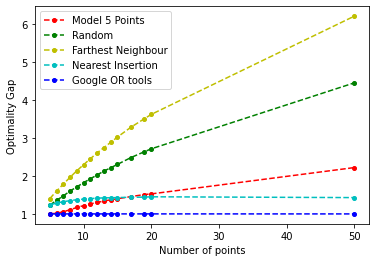

In [36]:
import matplotlib.pyplot as plt
plt.plot(x_ax,model ,'-r',markersize=4, linestyle='--', marker='o',label=f'Model {model_type} Points')
plt.plot(x_ax,random,'-g',markersize=4, linestyle='--', marker='o',label='Random')
plt.plot(x_ax,farthest_neighbour,'-y',markersize=4, linestyle='--', marker='o',label='Farthest Neighbour')
plt.plot(x_ax,nearest_insertion,'-c',markersize=4, linestyle='--', marker='o',label='Nearest Insertion')
# plt.plot(x_ax,nearest_neighbour,'-c',markersize=4, linestyle='--', marker='o',label='Nearest Insertion')
plt.plot(x_ax,gor,'-b',markersize=4, linestyle='--', marker='o',label='Google OR tools')
plt.legend()
plt.ylabel('Optimality Gap')
plt.xlabel('Number of points')
plt.show()

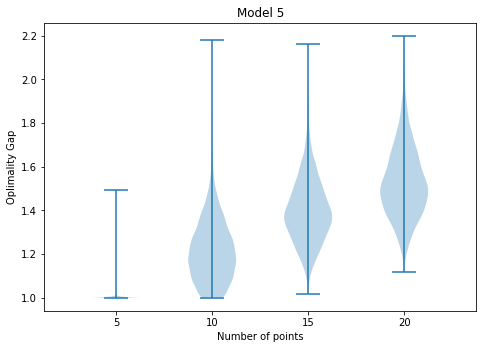

In [37]:
import matplotlib.pyplot as plt
import numpy as np
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Number of points')
collectn_1 = df[5]["Model"]
collectn_2 = df[10]["Model"]
collectn_3 = df[15]["Model"]
collectn_4 = df[20]["Model"]

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])
labels = ['5', '10', '15', '20']

ax.set_ylabel('Oplimality Gap')
ax.set_title(f'Model {model_type}')

set_axis_style(ax, labels)
# Create the boxplot
bp = ax.violinplot(data_to_plot)
# for pc in bp['bodies']: